# Data Models by Qiaoying Zhang

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# load data
df = pd.read_csv('num_air.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      34501 non-null  int64  
 1   Quarter                   34501 non-null  int64  
 2   State1                    34501 non-null  int64  
 3   temperature1              34501 non-null  float64
 4   precepitation1            34501 non-null  float64
 5   windspeed1                34501 non-null  float64
 6   State2                    34501 non-null  int64  
 7   temperature2              34501 non-null  float64
 8   precepitation2            34501 non-null  float64
 9   windspeed2                34501 non-null  float64
 10  airlineID                 34501 non-null  int64  
 11  Passengers_by_Carrier     34501 non-null  int64  
 12  Total_Mkt_Fare            34501 non-null  float64
 13  CarriersMktShare          34501 non-null  float64
 14  Carrie

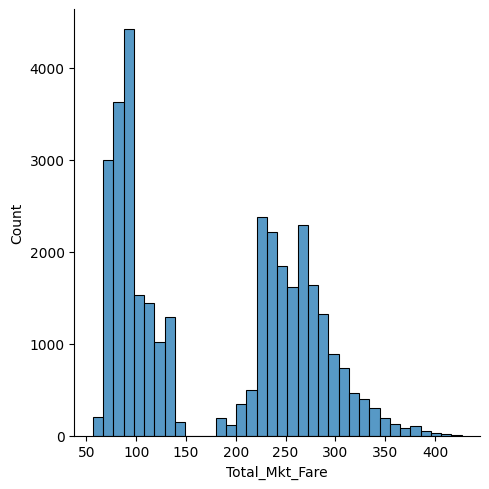

In [3]:
sns.displot(df, x='Total_Mkt_Fare')

In [4]:
from sklearn.model_selection import train_test_split

# make 20% test set and 80% training
a = df.to_numpy()
X = np.delete(a, 12, axis=1)
y = a[:, 12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27600, 22), (27600,), (6901, 22), (6901,))

In [6]:
# functions to calculate accuracy
def RMSE(y, ypred):
    differences = [(x-y)**2 for x, y in zip(ypred, y)]
    
    return np.sqrt(sum(differences) / len(differences))

def MAE(y, ypred):
    return abs(y-ypred).mean()

def get_acc(y, ypred):
    correct = []
    
    for i in range(len(y)):
        correct.append(y[i]==ypred[i])

    return sum(correct) / len(correct)

### Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
reg = clf.fit(X_train, y_train)
reg.score(X_train, y_train)

0.9407775888352568

In [8]:
reg.score(X_test, y_test)

0.9397336971312997

In [9]:
preds = reg.predict(X_test)
rmse = RMSE(y_test, preds)
mae = MAE(y_test, preds)
print('Linear Regression RMSE: {}, MAE: {}'.format(rmse, mae))

Linear Regression RMSE: 22.1037527024422, MAE: 14.334493844541147


### KNN, Bagging Regressor and GridSearchCV

Use GridSearchCV to find the best kNN hyperparameters and push kNN to its maximum performance using bagging.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [11]:
preds = knn_model.predict(X_test)
rmse = RMSE(y_test, preds)
mae = MAE(y_test, preds)
print('Linear Regression RMSE: {}, MAE: {}'.format(rmse, mae))

Linear Regression RMSE: 52.837567377362696, MAE: 33.88734965946964


**Compare predicted results with y_test (hue) by looking at 'Year' and 'Quarter' plot**

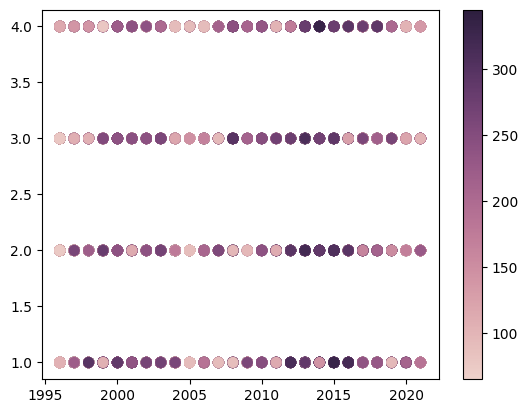

In [12]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

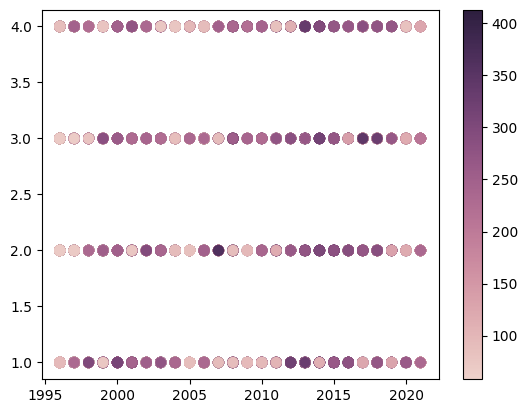

In [13]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

*Get best parameter 'n_neighbors' for KNN Regressor using Grid Search*

In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [15]:
gridsearch.best_params_

{'n_neighbors': 6}

In [41]:
# train_preds_grid = gridsearch.predict(X_train)
# rmse = RMSE(y_train, train_preds_grid)
# mae = MAE(y_train, train_preds_grid)
# print('GridSearchCV for k RMSE: {}, MAE: {}'.format(rmse, mae))

test_preds_grid = gridsearch.predict(X_test)
rmse = RMSE(y_test, test_preds_grid)
mae = MAE(y_test, test_preds_grid)
print('GridSearchCV for KNN Regressor with {} RMSE: {}, MAE: {}'.format(
    gridsearch.best_params_, rmse, mae))

GridSearchCV for k={'n_neighbors': 48, 'weights': 'distance'} RMSE: 51.808879950243686, MAE: 32.64671057275351


*Get best parameter 'n_neighbors' and 'weights' for KNN Regressor using Grid Search*

In [17]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [18]:
gridsearch.best_params_

{'n_neighbors': 48, 'weights': 'distance'}

In [19]:
test_preds_grid = gridsearch.predict(X_test)
rmse = RMSE(y_test, test_preds_grid)
mae = MAE(y_test, test_preds_grid)
print('GridSearchCV for KNN Regressor with {} RMSE: {}, MAE: {}'.format(
    gridsearch.best_params_, rmse, mae))

GridSearchCV for k and weights RMSE: 51.808879950243686, MAE: 32.64671057275351


*Apply best parameter 'n_neighbors' and 'weights' for KNN Regressor to Bagging Regressor to get best performance.*

In [20]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [21]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)
test_preds_grid = bagging_model.predict(X_test)
rmse = RMSE(y_test, test_preds_grid)
mae = MAE(y_test, test_preds_grid)
print('Bagging Regressor RMSE: {}, MAE: {}'.format(rmse, mae))

Bagging and GridSearchCV RMSE: 51.311060665102325, MAE: 32.960219195168754


In [42]:
# Overall bagging KNN regressor accuracy:
bagging_model.score(X_test, y_test)

0.6752385228593656

In [23]:
# classify y_train and y_test data
train = [int(y/100) for y in y_train]
test = [int(y/100) for y in y_test]

### Decision Tree

In [24]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
dt = clf.fit(X_train, train)
dt.score(X_train, train)

1.0

In [25]:
preds = dt.predict(X_test)
print('Accuracy for Decision Tree model: {}'.format(get_acc(test, preds)))

Accuracy for Decision Tree model: 0.9913056078829156


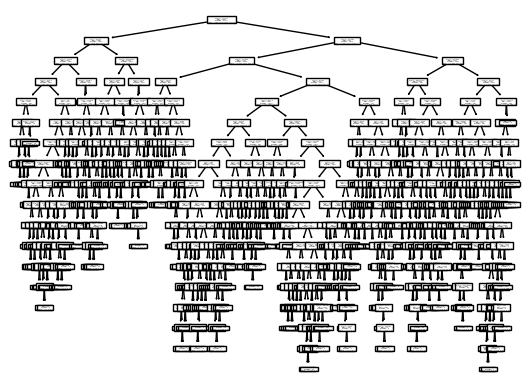

In [26]:
tree.plot_tree(dt)
plt.show()

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=20, random_state=0)
randf = clf.fit(X_train, train)
randf.score(X_train, train)

1.0

In [28]:
preds = randf.predict(X_test)
print('Accuracy for Random Forest model: {}'.format(get_acc(test, preds)))

Accuracy for Random Forest model: 0.9969569627590205


In [29]:
clf.predict(X_test)

array([0, 1, 0, ..., 2, 0, 0])

In [30]:
preds = randf.predict(X_test)
print('Accuracy for Random Forest model: {}'.format(get_acc(test, preds)))

Accuracy for Random Forest model: 0.9969569627590205


### Gaussian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
gnb = clf.fit(X_train, train)
gnb.score(X_train, train)

0.5956159420289855

In [32]:
preds = gnb.predict(X_test)
print('Accuracy for Naive Bayes model: {}'.format(get_acc(test, preds)))

Accuracy for Naive Bayes model: 0.6083176351253442


### Logistic Regression with Randomized Search CV
Tests the best hyperparameter

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_train, train)
search.score(X_train, train)

0.4180072463768116

In [34]:
preds = search.predict(X_test)
print('Accuracy for Randomized Search CV model: {}'.format(get_acc(test, preds)))

Accuracy for Randomized Search CV model: 0.4280539052311259


### Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb = clf.fit(X_train, train)
gb.score(X_train, train)

0.8903260869565217

In [36]:
preds = gb.predict(X_test)
print('Accuracy for Gradient Boosting model: {}'.format(get_acc(test, preds)))

Accuracy for Gradient Boosting model: 0.8876974351543254


### Soft Vector Machine

In [37]:
from sklearn import svm

clf = svm.SVC().fit(X_train, train)
clf.score(X_train, train)

0.5431159420289855

In [38]:
preds = gb.predict(X_test)
print('Accuracy for Soft Vector Machine model: {}'.format(get_acc(test, preds)))

Accuracy for Soft Vector Machine model: 0.8876974351543254
